In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
header = pd.read_csv("/content/drive/MyDrive/key.csv",sep='\t',header=None).transpose()[0].tolist()


In [4]:
test = pd.read_csv("/content/drive/MyDrive/test-balanced.csv",sep='\t',names = header)
train = pd.read_csv("/content/drive/MyDrive/train-balanced.csv",sep='\t',names = header)

In [5]:
test.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,Actually most of her supporters and sane peopl...,Quinnjester,politics,3,3,0,2016-09,1473569605,Hillary's Surrogotes Told to Blame Media for '...
1,0,They can't survive without an echo chamber whi...,TheGettysburgAddress,The_Donald,13,-1,-1,2016-11,1478788413,Thank God Liberals like to live in concentrate...
2,0,you're pretty cute yourself 1729 total,Sempiternally_free,2007scape,8,-1,-1,2016-11,1478042903,Saw this cutie training his Attack today...
3,0,If you kill me you'll crash the meme market,Catacomb82,AskReddit,2,-1,-1,2016-10,1477412597,If you were locked in a room with 49 other peo...
4,0,I bet he wrote that last message as he was sob...,Dorian-throwaway,niceguys,5,-1,-1,2016-11,1477962278,You're not even that pretty!


In [6]:
len(train)

1010826

In [10]:
filt=train["comment"]<"200"

In [11]:
train.drop(index=train[filt].index)

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,1476662123,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,1477959850,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,1474580737,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,1476824627,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,1483117213,Yep can confirm I saw the tool they use for th...
...,...,...,...,...,...,...,...,...,...,...
1010821,1,I'm sure that Iran and N. Korea have the techn...,TwarkMain,reddit.com,2,2,0,2009-04,1240620472,"No one is calling this an engineered pathogen,..."
1010822,1,"whatever you do, don't vote green!",BCHarvey,climate,1,1,0,2009-05,1242340060,In a move typical of their recent do-nothing a...
1010823,1,Perhaps this is an atheist conspiracy to make ...,rebelcommander,atheism,1,1,0,2009-01,1231633377,Screw the Disabled--I've got to get to Church ...
1010824,1,The Slavs got their own country - it is called...,catsi,worldnews,1,1,0,2009-01,1232745169,I've always been unsettled by that. I hear a l...


In [12]:
len(train)

1010826

In [ ]:
test.describe()

,label,score,ups,downs,created_utc
count,251608.000000,251608.000000,251608.000000,251608.000000,2.516080e+05
mean,0.500000,6.757452,5.410953,-0.143751,1.438535e+09
std,0.500001,48.450781,39.402618,0.350838,3.950226e+07
min,0.000000,-329.000000,-329.000000,-1.000000,1.230881e+09
25%,0.000000,1.000000,0.000000,0.000000,1.420403e+09
50%,0.500000,2.000000,1.000000,0.000000,1.448768e+09
75%,1.000000,4.000000,3.000000,0.000000,1.468522e+09
max,1.000000,9923.000000,4835.000000,0.000000,1.483229e+09


In [ ]:
train.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,1476662123,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,1477959850,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,1474580737,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,1476824627,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,1483117213,Yep can confirm I saw the tool they use for th...


In [ ]:
train.subreddit.value_counts()

AskReddit              65677
politics               39496
worldnews              26377
leagueoflegends        21037
pcmasterrace           18988
                       ...  
karmacidewatch             1
de_IT                      1
poultry                    1
imaginarycosmere           1
PaintlessDentRepair        1
Name: subreddit, Length: 14878, dtype: int64

In [ ]:
test.describe()

,label,score,ups,downs,created_utc
count,251608.000000,251608.000000,251608.000000,251608.000000,2.516080e+05
mean,0.500000,6.757452,5.410953,-0.143751,1.438535e+09
std,0.500001,48.450781,39.402618,0.350838,3.950226e+07
min,0.000000,-329.000000,-329.000000,-1.000000,1.230881e+09
25%,0.000000,1.000000,0.000000,0.000000,1.420403e+09
50%,0.500000,2.000000,1.000000,0.000000,1.448768e+09
75%,1.000000,4.000000,3.000000,0.000000,1.468522e+09
max,1.000000,9923.000000,4835.000000,0.000000,1.483229e+09


In [ ]:
print("Reddit data set has:\nNumber of observation by row:", len(train["label"]), "\nNumber of columns:", len(train.columns))

Reddit data set has:
Number of observation by row: 1010826 
Number of columns: 10


In [ ]:
test.isna().sum()

label              0
comment           14
author             0
subreddit          0
score              0
ups                0
downs              0
date               0
created_utc        0
parent_comment     0
dtype: int64

In [ ]:
train.corr()

,label,score,ups,downs,created_utc
label,1.000000,-0.010028,-0.006697,0.057546,-0.057547
score,-0.010028,1.000000,0.849238,-0.013864,0.016939
ups,-0.006697,0.849238,1.000000,0.065070,-0.014934
downs,0.057546,-0.013864,0.065070,1.000000,-0.426066
created_utc,-0.057547,0.016939,-0.014934,-0.426066,1.000000


In [ ]:
import seaborn as sns

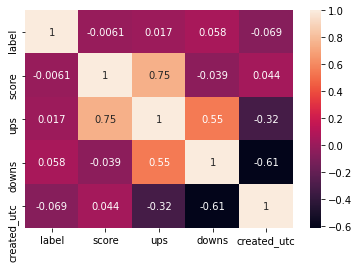

In [ ]:
corr = train.corr(method = 'spearman')
sns.heatmap(corr,annot = True)

In [ ]:
train.isnull().sum()

label              0
comment           53
author             0
subreddit          0
score              0
ups                0
downs              0
date               0
created_utc        0
parent_comment     0
dtype: int64

In [ ]:
test.isnull().sum()

label              0
comment           14
author             0
subreddit          0
score              0
ups                0
downs              0
date               0
created_utc        0
parent_comment     0
dtype: int64

In [ ]:
test["label"].describe

<bound method NDFrame.describe of 0         0
1         0
2         0
3         0
4         0
         ..
251603    1
251604    1
251605    1
251606    1
251607    1
Name: label, Length: 251608, dtype: int64>

In [ ]:
test["comment"].isnull().sum()

14

In [ ]:
len(test["label"])

251608

In [ ]:
len(test["comment"])

251608

In [ ]:
len(train)

1010826

In [ ]:
train.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)

In [ ]:
train.isnull().sum()

label             0
comment           0
author            0
subreddit         0
score             0
ups               0
downs             0
date              0
created_utc       0
parent_comment    0
dtype: int64

In [ ]:
len(train)

1010773

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train['comment'] = train.comment.map(lambda x: x.lower())

In [ ]:
train['parent_comment'] = train.parent_comment.map(lambda x: x.lower())

In [ ]:
train.head(10)

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,nc and nh.,Trumpbart,politics,2,-1,-1,2016-10,1476662123,"yeah, i get that argument. at this point, i'd ..."
1,0,you do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,1477959850,the blazers and mavericks (the wests 5 and 6 s...
2,0,"they were underdogs earlier today, but since g...",Creepeth,nfl,3,3,0,2016-09,1474580737,they're favored to win.
3,0,"this meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,1476824627,deadass don't kill my buzz
4,0,i could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,1483117213,yep can confirm i saw the tool they use for th...
5,0,"i don't pay attention to her, but as long as s...",only7inches,AskReddit,0,0,0,2016-09,1472812508,do you find ariana grande sexy ?
6,0,trick or treating in general is just weird...,only7inches,AskReddit,1,-1,-1,2016-10,1477258983,what's your weird or unsettling trick or treat...
7,0,blade mastery+masamune or gtfo!,P0k3rm4s7,FFBraveExvius,2,-1,-1,2016-10,1476393235,probably sephiroth. i refuse to taint his grea...
8,0,"you don't have to, you have a good build, buy ...",SoupToPots,pcmasterrace,1,-1,-1,2016-10,1477595466,what to upgrade? i have $500 to spend (mainly ...
9,0,i would love to see him at lolla.,chihawks,Lollapalooza,2,-1,-1,2016-11,1479771552,probably count kanye out since the rest of his...


In [ ]:
train['comment'] = train.comment.str.replace('[^\w\s]', '')

In [ ]:
train['parent_comment'] = train.parent_comment.str.replace('[^\w\s]', '')

In [ ]:
train.head(10)

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,nc and nh,Trumpbart,politics,2,-1,-1,2016-10,1476662123,yeah i get that argument at this point id pref...
1,0,you do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,1477959850,the blazers and mavericks the wests 5 and 6 se...
2,0,they were underdogs earlier today but since gr...,Creepeth,nfl,3,3,0,2016-09,1474580737,theyre favored to win
3,0,this meme isnt funny none of the new york nigg...,icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,1476824627,deadass dont kill my buzz
4,0,i could use one of those tools,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,1483117213,yep can confirm i saw the tool they use for th...
5,0,i dont pay attention to her but as long as she...,only7inches,AskReddit,0,0,0,2016-09,1472812508,do you find ariana grande sexy
6,0,trick or treating in general is just weird,only7inches,AskReddit,1,-1,-1,2016-10,1477258983,whats your weird or unsettling trick or treat ...
7,0,blade masterymasamune or gtfo,P0k3rm4s7,FFBraveExvius,2,-1,-1,2016-10,1476393235,probably sephiroth i refuse to taint his great...
8,0,you dont have to you have a good build buy gam...,SoupToPots,pcmasterrace,1,-1,-1,2016-10,1477595466,what to upgrade i have 500 to spend mainly bec...
9,0,i would love to see him at lolla,chihawks,Lollapalooza,2,-1,-1,2016-11,1479771552,probably count kanye out since the rest of his...


In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
train['comment'] = train['comment'].apply(nltk.word_tokenize)

In [ ]:
train['parent_comment'] = train['parent_comment'].apply(nltk.word_tokenize)

In [ ]:
from nltk.stem import PorterStemmer

In [ ]:
stemmer = PorterStemmer()

In [ ]:
train.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,"[nc, and, nh]",Trumpbart,politics,2,-1,-1,2016-10,1476662123,"[yeah, i, get, that, argument, at, this, point..."
1,0,"[you, do, know, west, teams, play, against, we...",Shbshb906,nba,-4,-1,-1,2016-11,1477959850,"[the, blazers, and, mavericks, the, wests, 5, ..."
2,0,"[they, were, underdogs, earlier, today, but, s...",Creepeth,nfl,3,3,0,2016-09,1474580737,"[theyre, favored, to, win]"
3,0,"[this, meme, isnt, funny, none, of, the, new, ...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,1476824627,"[deadass, dont, kill, my, buzz]"
4,0,"[i, could, use, one, of, those, tools]",cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,1483117213,"[yep, can, confirm, i, saw, the, tool, they, u..."


In [ ]:
train['comment'] = train['comment'].apply(lambda x: [stemmer.stem(y) for y in x])

In [ ]:
train['parent_comment'] = train['parent_comment'].apply(lambda x: [stemmer.stem(y) for y in x])

In [ ]:
train.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,"[nc, and, nh]",Trumpbart,politics,2,-1,-1,2016-10,1476662123,"[yeah, i, get, that, argument, at, thi, point,..."
1,0,"[you, do, know, west, team, play, against, wes...",Shbshb906,nba,-4,-1,-1,2016-11,1477959850,"[the, blazer, and, maverick, the, west, 5, and..."
2,0,"[they, were, underdog, earlier, today, but, si...",Creepeth,nfl,3,3,0,2016-09,1474580737,"[theyr, favor, to, win]"
3,0,"[thi, meme, isnt, funni, none, of, the, new, y...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,1476824627,"[deadass, dont, kill, my, buzz]"
4,0,"[i, could, use, one, of, those, tool]",cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,1483117213,"[yep, can, confirm, i, saw, the, tool, they, u..."


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
train['comment'] = train['comment'].apply(lambda x: ' '.join(x))

In [ ]:
train['parent_comment'] = train['parent_comment'].apply(lambda x: ' '.join(x))

In [ ]:
train.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,nc and nh,Trumpbart,politics,2,-1,-1,2016-10,1476662123,yeah i get that argument at thi point id prefe...
1,0,you do know west team play against west team m...,Shbshb906,nba,-4,-1,-1,2016-11,1477959850,the blazer and maverick the west 5 and 6 seed ...
2,0,they were underdog earlier today but sinc gron...,Creepeth,nfl,3,3,0,2016-09,1474580737,theyr favor to win
3,0,thi meme isnt funni none of the new york nigga...,icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,1476824627,deadass dont kill my buzz
4,0,i could use one of those tool,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,1483117213,yep can confirm i saw the tool they use for th...


In [ ]:
count_vect = CountVectorizer()

In [ ]:
counts = count_vect.fit_transform(train['comment'])

In [ ]:
counts = count_vect.fit_transform(train['parent_comment'])

In [ ]:
train['subreddit'].unique()

array(['politics', 'nba', 'nfl', ..., 'PigJargon', 'Learnmusic',
       'Pandemic'], dtype=object)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
transformer = TfidfTransformer().fit(counts)

In [ ]:
counts = transformer.transform(counts)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

train ,test = train_test_split(train,test_size=0.2) 
np.random.seed(0)
train

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
552224,0,welp i guess my mtgo account is go to actual g...,memeius,magicTCG,3,3,0,2015-12,1450161759,year of modern flashback
399412,0,so i see your into ape,Ezdaar,4chan,15,15,0,2016-02,1456741950,niggeress have nice ass but almost all end up ...
870834,0,fuck you ejm,garrzilla,2007scape,0,0,0,2014-10,1414103636,jagex favorit streamer againwait they are bug
731009,0,petti is gon na great,Kite23,baylor,2,2,0,2015-02,1423515073,petti hagar goodley and roth invit to nfl scou...
667635,1,men cant get rape,thekindlyman555,OttawaSenators,7,7,0,2015-04,1429749871,ok i get the messag for the sexual harass comm...
...,...,...,...,...,...,...,...,...,...,...
74434,0,wascomat,pkuriakose,BuyItForLife,1,-1,-1,2016-11,1479781224,washer and dryer i just move into my first hou...
1002922,1,aww man theyr no longer cool,aCleverMoniker,Music,1,1,0,2011-01,1294552561,black key on snl tonight much respect for the ...
511160,1,fuck capitalist make money by give us higher q...,leaftreeforest,politics,1,1,0,2015-09,1443193314,the price of comput ha gone down a metric shit...
145585,1,god damn bill nye,ToyKnife,AskReddit,4,-1,-1,2016-12,1480937332,wait four hour in the blister cold and he just...


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(counts, train['label'], test_size=0.2,
random_state=0)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
model = MultinomialNB().fit(X_train, y_train)

In [ ]:
predicted = model.predict(X_test)

In [ ]:
print("Accuracy of the model is:",np.mean(predicted == y_test),"%")

Accuracy of the model is: 0.5819049739061611 %


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cf_matrix = confusion_matrix(y_test, predicted)
print(cf_matrix)

[[56765 44404]
 [40116 60870]]


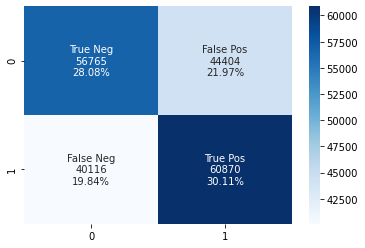

In [ ]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')